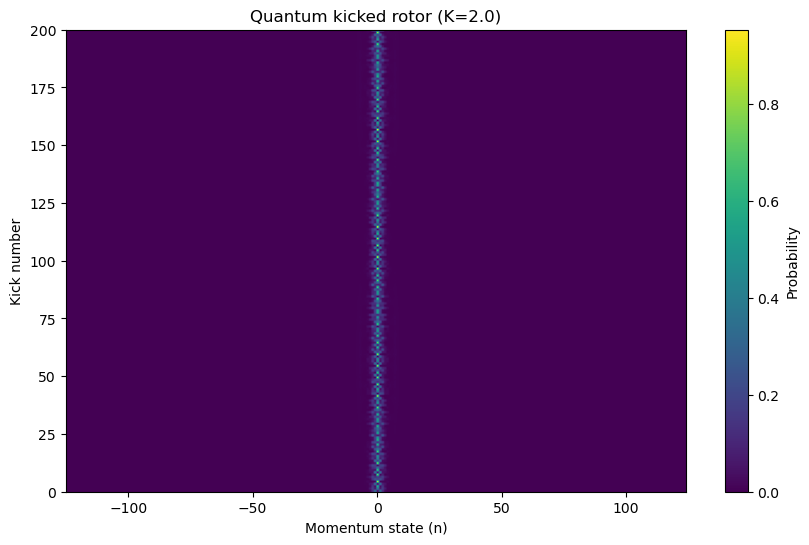

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#Params
N = 250            
K = 2.0          
hbar = 1.0         
T = 1.0            
num_steps = 200   

# Momentum states -N/2 ... N/2-1
n = np.arange(-N//2, N//2)
theta = np.linspace(0, 2*np.pi, N, endpoint=False)

# Kinetic operator 
kinetic = np.exp(-1j * (n**2) * T * hbar / 2)

# Potential operator 
V_theta = np.exp(-1j * K / hbar * np.cos(theta))

# Fourier matrices
F = np.fft.fft(np.eye(N)) / np.sqrt(N)
F_inv = np.conj(F.T)

U = (kinetic[:, None] * (F_inv @ (V_theta[:, None] * (F @ np.eye(N)))))

# Initial state: localized at zero momentum
psi = np.zeros(N, dtype=complex)
psi[N//2] = 1.0

# Store momentum distribution
momentum_distributions = []

for step in range(num_steps):
    psi = U @ psi
    prob_p = np.abs(psi)**2
    momentum_distributions.append(prob_p)

momentum_distributions = np.array(momentum_distributions)


plt.figure(figsize=(10,6))
plt.imshow(momentum_distributions, aspect='auto', origin='lower',
           extent=[n[0], n[-1], 0, num_steps], cmap='viridis')
plt.xlabel('Momentum state (n)')
plt.ylabel('Kick no.')
plt.title(f'Quantum kicked rotor (K={K})')
plt.colorbar(label='Prob')
plt.show()


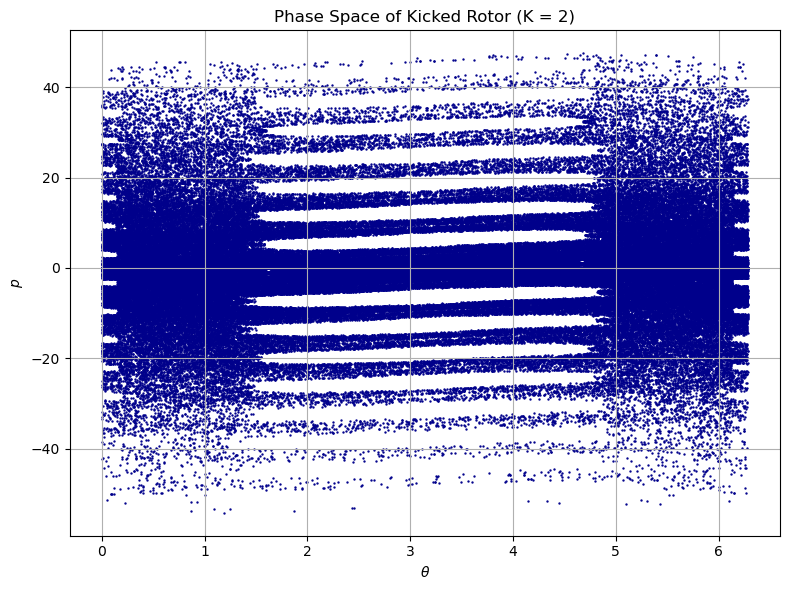

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Params
K = 2          
N = 1000             
theta = np.linspace(0, 2 * np.pi, 300)  
p0 = 0.0  

all_theta = []
all_p = []

for th0 in theta:
    th = th0
    p = p0
    th_list = []
    p_list = []
    
    for i in range(N):
        p += K * np.sin(th)
        th = (th + p) % (2 * np.pi)
        th_list.append(th)
        p_list.append(p)
    
    all_theta.extend(th_list)
    all_p.extend(p_list)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(all_theta, all_p, s=0.5, color='darkblue')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p$')
plt.title(f'Phase Space of Kicked Rotor (K = {K})')
plt.grid(True)
plt.tight_layout()
plt.show()


[-5.27577981e-12+0.00000000e+00j -1.55190544e-07+4.93976213e-05j
 -6.20757746e-07+9.87962158e-05j -1.39675158e-06+1.48196771e-04j
 -2.48325085e-06+1.97600261e-04j -3.88032989e-06+2.47007631e-04j
 -5.58806983e-06+2.96419862e-04j -7.60660563e-06+3.45837962e-04j
 -9.93613436e-06+3.95262902e-04j -1.25768358e-05+4.44695642e-04j
 -1.55288869e-05+4.94137163e-04j -1.87925458e-05+5.43588461e-04j
 -2.23680767e-05+5.93050503e-04j -2.62557438e-05+6.42524256e-04j
 -3.04558668e-05+6.92010719e-04j -3.49687722e-05+7.41510861e-04j
 -3.97948050e-05+7.91025678e-04j -4.49343707e-05+8.40556157e-04j
 -5.03878761e-05+8.90103262e-04j -5.61557305e-05+9.39668001e-04j
 -6.22384111e-05+9.89251362e-04j -6.86364066e-05+1.03885432e-03j
 -7.53502062e-05+1.08847787e-03j -8.23803553e-05+1.13812301e-03j
 -8.97274106e-05+1.18779073e-03j -9.73919489e-05+1.23748204e-03j
 -1.05374593e-04+1.28719793e-03j -1.13675973e-04+1.33693939e-03j
 -1.22296749e-04+1.38670743e-03j -1.31237626e-04+1.43650307e-03j
 -1.40499300e-04+1.486327

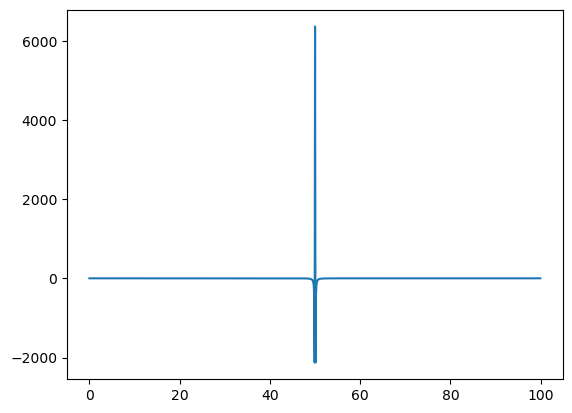